In [12]:
from RSjunyi import rs
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization,Reshape,Permute,Activation  

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder 

**************************************************
{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 5664, 'height': 5142, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
h * w * b: (5142, 5664, 1)
data type: uint8
**************************************************
(5142, 5664, 1)
(5142, 5664, 5)
clip: (5142, 5664)


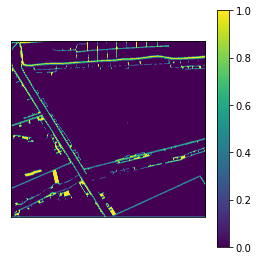

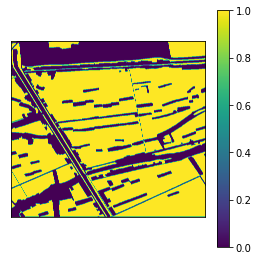

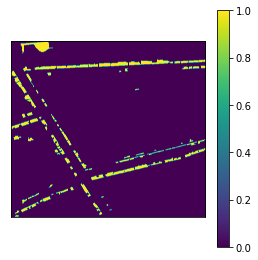

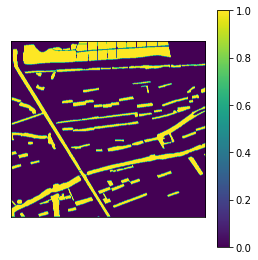

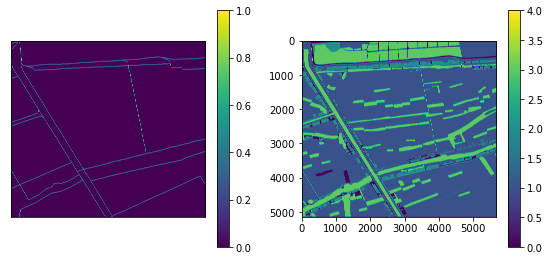

In [13]:
# rs.img_plot('/Volumes/工作/语义分割代码/Pycharm_Project_RS_DL/to_cat/training/train1_labels_8bits.png')

img = rs.img_read('/Volumes/工作/语义分割代码/Pycharm_Project_RS_DL/to_cat/training/train1_labels_8bits.png')

# 这里对于rs进行修正，

print(img.shape)

img1 = to_categorical(img)
print(img1.shape)

print('clip:',img1[:,:,0].shape)
for i in range(5):
    plt.figure(figsize = (20, 20))
    plt.subplot(4,4, i+1)
    plt.imshow(img1[:,:, i])
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

plt.subplot(4, 4, 6)
plt.imshow(img.squeeze())
plt.colorbar()
plt.show()

reshape: (65536,)
flatten: (65536,)
labelencoder: (65536,)
to_categorical: (65536, 6)
to_categorical: (256, 256, 6)


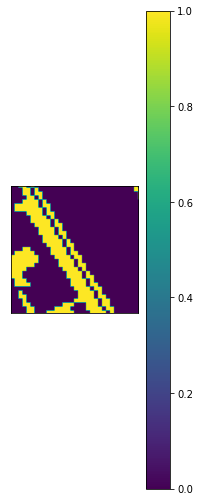

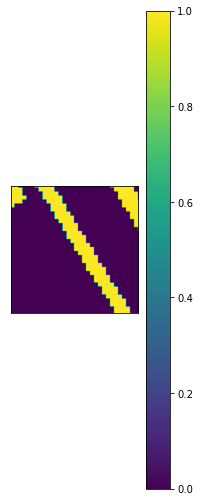

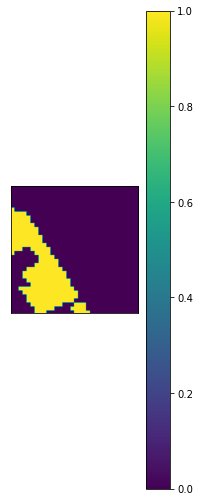

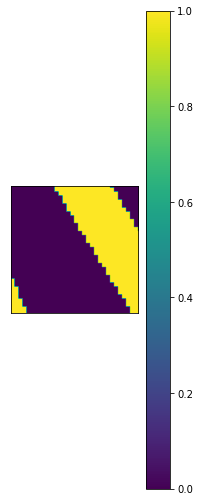

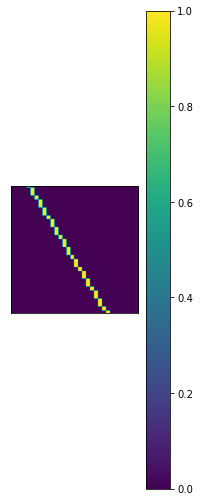

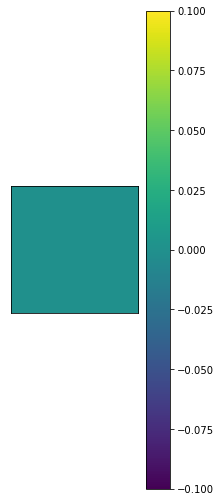

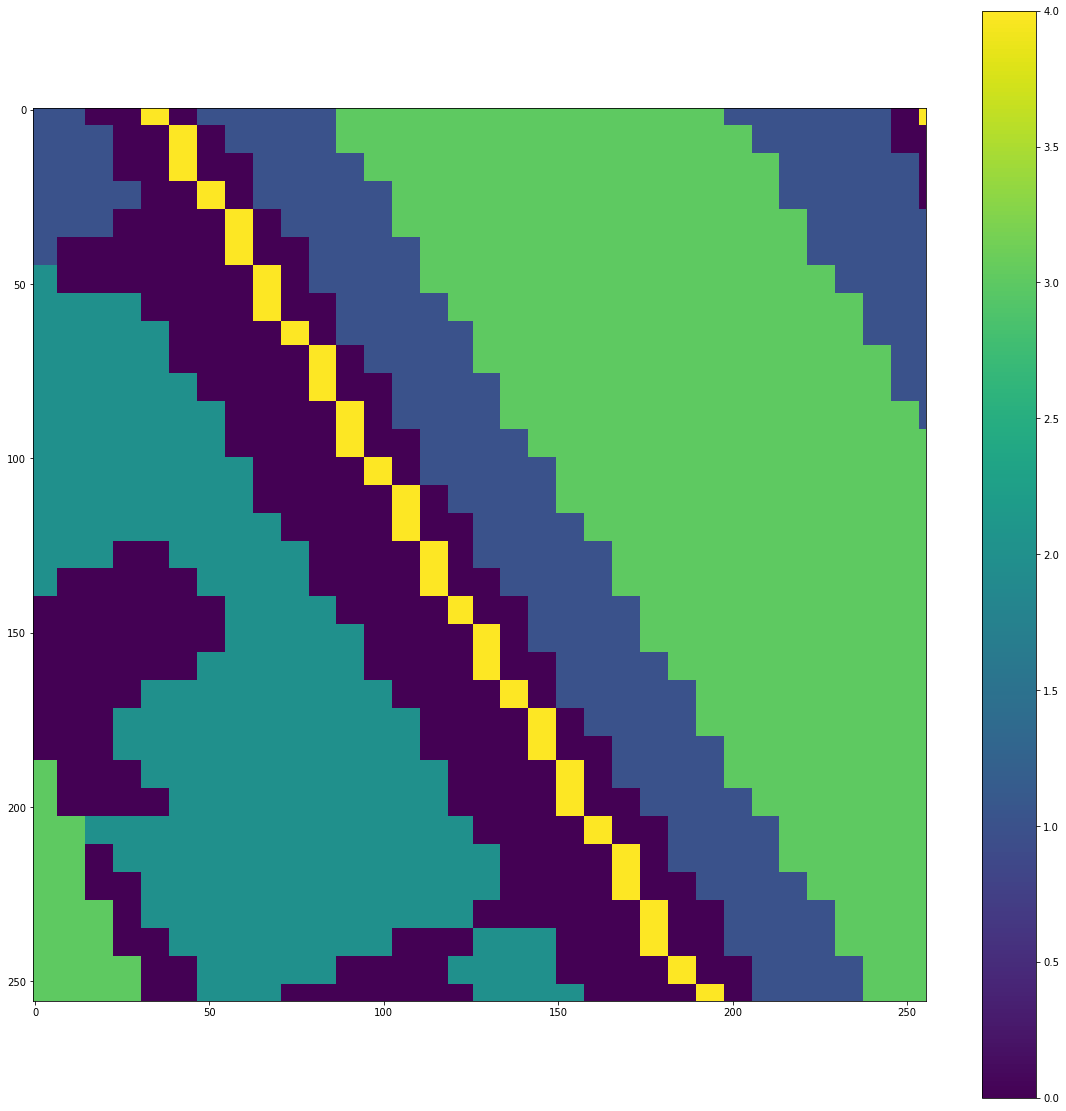

In [23]:
# 报错的原因在于，label为[0, 1, 2, 3, 4]， 需要把label转换为[0.0,17.0,34.0,51.0,68.0,255.0]
classes =[0, 1, 2, 3, 4, 5]
labelencoder = LabelEncoder()  
labelencoder.fit(classes)

# 这里研究one-hot key的转换，主要是sklearn的LabelEncoder 类，和keras的to_categorical
# 做一个数据生成器，掌握batch的输出，特别是label维度问题，明天需要研究两个案例的label维度的输出，对应的网络结构改变
label = rs.img_read('/Volumes/工作/语义分割代码/Pycharm_Project_RS_DL/to_cat/label_test/4.png', info = False)

label = img_to_array(label).reshape((256 *256, ))
print('reshape:', label.shape)

label = np.array(label).flatten()
print('flatten:', label.shape)

label = labelencoder.transform(label)
print('labelencoder:', label.shape)

label = to_categorical(label, num_classes= 6)
print('to_categorical:', label.shape)

label = label.reshape((256, 256, 6))
print('to_categorical:', label.shape)

for i in range(6):
    plt.figure(figsize = (20, 20))
    plt.subplot(1,6, i+1)
    plt.imshow(label[:,:, i])
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

rs.img_plot('/Volumes/工作/语义分割代码/Pycharm_Project_RS_DL/to_cat/label_test/4.png')

In [24]:
img_h, img_w = 512, 512
n_label = 6 
def SegNet():
    model = Sequential()  
    #encoder  
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(img_w,img_h,3),padding='same',activation='relu',data_format='channels_last'))
    model.add(BatchNormalization())  
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))  
    model.add(BatchNormalization())  
    model.add(MaxPooling2D(pool_size=(2,2)))  
    #(128,128)  
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(MaxPooling2D(pool_size=(2,2)))
    #(64,64)  
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    #(32,32)  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    #(16,16)  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    #(8,8)  
    #decoder  
    model.add(UpSampling2D(size=(2,2)))  
    #(16,16)  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(UpSampling2D(size=(2, 2)))  
    #(32,32)  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(UpSampling2D(size=(2, 2)))  
    #(64,64)  
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(UpSampling2D(size=(2, 2)))  
    #(128,128)  
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(UpSampling2D(size=(2, 2)))  
    #(256,256)  
    model.add(Conv2D(64, (3, 3), strides=(1, 1), input_shape=(img_w, img_h,3), padding='same', activation='relu',data_format='channels_last'))
    model.add(BatchNormalization())  
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(n_label, (1, 1), strides=(1, 1), padding='same'))  
    model.add(Activation('softmax'))  
    model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])  
    model.summary()  
    return model

model= SegNet()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 512, 512, 64)      1792      
_________________________________________________________________
batch_normalization_108 (Bat (None, 512, 512, 64)      256       
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 512, 512, 64)      36928     
_________________________________________________________________
batch_normalization_109 (Bat (None, 512, 512, 64)      256       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 256, 256, 128)     73856     
_________________________________________________________________
batch_normalization_110 (Bat (None, 256, 256, 128)    

In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
def unet(num_classes, input_shape, lr_init, lr_decay):
    img_input = Input(input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x)
    x = BatchNormalization()(x)
    block_1_out = Activation('relu')(x)

    x = MaxPooling2D()(block_1_out)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)
    x = BatchNormalization()(x)
    block_2_out = Activation('relu')(x)

    x = MaxPooling2D()(block_2_out)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x)
    x = BatchNormalization()(x)
    block_3_out = Activation('relu')(x)

    x = MaxPooling2D()(block_3_out)

    # Block 4
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x)
    x = BatchNormalization()(x)
    block_4_out = Activation('relu')(x)

    x = MaxPooling2D()(block_4_out)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same', name='block5_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block5_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block5_conv3')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    
    # UP 1
    x = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_4_out])
    x = Conv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 2
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_3_out])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 3
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_2_out])
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 4
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_1_out])
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # last conv
    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(lr=lr_init, decay=lr_decay),
                  loss='categorical_crossentropy',
                  metrics=['categorical_accuracy'])
    model.summary()
    return model

model = unet(6, (512, 512, 3), 0.1, 0.01)

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 512, 512, 64) 1792        input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_192 (BatchN (None, 512, 512, 64) 256         block1_conv1[0][0]               
__________________________________________________________________________________________________
activation_62 (Activation)      (None, 512, 512, 64) 0           batch_normalization_192[0][0]    
_______________________________________________________________________________________